Team Rolling Averages - Expected Score

- Expected Score For v Against

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

In [2]:
from expected_score_model.visualisation.plot_team_rolling_averages import create_team_rolling, plot_team_rolling_ax, plot_all_team_rolling_figure

In [23]:
style_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/src/expected_score_model/visualisation/styles/rolling_dark.mplstyle"
# style_path = "/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/src/expected_score_model/visualisation/styles/rolling_light.mplstyle"

plt.style.use(style_path)

Data

In [24]:
from AFLPy.AFLData_Client import load_data

In [25]:
shots = load_data(Dataset_Name = "CG_Expected_Score")
shots['Year'] = shots['Match_ID'].apply(lambda x: int(x.split("_")[1]))
shots['Round'] = shots['Match_ID'].apply(lambda x: x.split("_")[2])
shots.head()

,CD_Player_ID,Chain_Number,Team_Chain,Initial_State,Final_State,Period_Number,Period_Duration_Chain_Start,Description,Disposal,Shot_At_Goal,Behind_Detail,Order,Period_Duration,x,y,Home_Team,Away_Team,Home_Team_Direction_Q1,Venue_Width,Venue_Length,Player,Team,Match_ID,Player_ID,result,score,miss,behind,goal,predicted_result,behind_probas,goal_probas,miss_probas,xscore,Description_grouped,angle,angle_degrees,chain_duration,description_grouped_0,description_grouped_1,description_grouped_2,description_grouped_3,distance,distance_log,distance_since_last_action,distance_squared,distance_to_goal_x,distance_to_middle_y,initial_state,period_duration_0,period_duration_1,period_duration_2,period_duration_3,set_shot,time_since_last_action,visible_behind_angle,visible_behind_angle_degrees,visible_goal_angle,visible_goal_angle_degrees,x_0,x_1,x_2,x_3,y_0,y_1,y_2,y_3,Year,Round
0,CD_I1000978,8,Brisbane,possGain,goal,1.0,139.0,Kick,effective,True,NaN,61.0,183.0,58.0,-43.0,Brisbane,Carlton,right,138.0,156.0,Hugh McCluggage,Brisbane,AFL_2024_00_Brisbane_Carlton,hugh_mccluggage,goal,6,0,0,1,miss,0.272966,0.311027,0.416007,2.139129,Kick,1.135443,65.056095,44.0,Kick,Mark,Kick,Other,47.423623,3.859120,9.899495,2249.0,20.0,43.0,possGain,183.0,159.0,157.0,156.0,1,24.0,0.178038,10.200840,0.057175,3.275858,58.0,65.0,65.0,47.0,-43.0,-36.0,-36.0,-52.0,2024,00
1,CD_I1000953,14,Carlton,possGain,goal,1.0,328.0,Kick,effective,True,NaN,111.0,385.0,37.0,7.0,Brisbane,Carlton,right,138.0,156.0,Harry McKay,Carlton,AFL_2024_00_Brisbane_Carlton,harry_mckay,goal,6,0,0,1,goal,0.315075,0.662386,0.022539,4.289389,Kick,0.169101,9.688787,57.0,Kick,Mark,Kick,Other,41.593269,3.727938,8.062258,1730.0,41.0,7.0,possGain,385.0,348.0,344.0,344.0,1,37.0,0.480633,27.538244,0.152579,8.742157,37.0,45.0,45.0,33.0,7.0,6.0,6.0,46.0,2024,00
2,CD_I1002235,18,Brisbane,possGain,goal,1.0,483.0,Kick,effective,True,NaN,146.0,497.0,73.0,-4.0,Brisbane,Carlton,right,138.0,156.0,Cam Rayner,Brisbane,AFL_2024_00_Brisbane_Carlton,cam_rayner,goal,6,0,0,1,goal,0.059792,0.922198,0.018011,5.592977,Kick,0.674741,38.659808,14.0,Kick,Mark,Kick,Mark,6.403124,1.856786,2.828427,41.0,5.0,4.0,possGain,497.0,496.0,494.0,493.0,1,1.0,-1.876466,-107.513582,1.040312,59.605492,73.0,71.0,52.0,48.0,-4.0,-6.0,-35.0,-34.0,2024,00
3,CD_I261224,25,Brisbane,throwIn,goal,1.0,682.0,Ground Kick,effective,True,NaN,210.0,751.0,64.0,3.0,Brisbane,Carlton,right,138.0,156.0,Dayne Zorko,Brisbane,AFL_2024_00_Brisbane_Carlton,dayne_zorko,goal,6,0,0,1,goal,0.347254,0.535427,0.117319,3.559815,Kick,0.211093,12.094757,69.0,Kick,Kick,Mark,Kick,14.317821,2.661505,49.819675,205.0,14.0,3.0,throwIn,751.0,742.0,711.0,709.0,0,9.0,2.382134,136.486224,0.460053,26.359118,64.0,55.0,59.0,59.0,3.0,-46.0,-43.0,-43.0,2024,00
4,CD_I261224,27,Brisbane,possGain,goal,1.0,876.0,Kick,effective,True,NaN,227.0,907.0,61.0,-25.0,Brisbane,Carlton,right,138.0,156.0,Dayne Zorko,Brisbane,AFL_2024_00_Brisbane_Carlton,dayne_zorko,goal,6,0,0,1,goal,0.403359,0.519147,0.077495,3.518238,Kick,0.973620,55.784298,31.0,Kick,Mark,Kick,Other,30.232433,3.408915,8.062258,914.0,17.0,25.0,possGain,907.0,886.0,884.0,883.0,1,21.0,0.397158,22.755454,0.120386,6.897606,61.0,65.0,65.0,5.0,-25.0,-18.0,-18.0,-33.0,2024,00


Single Team

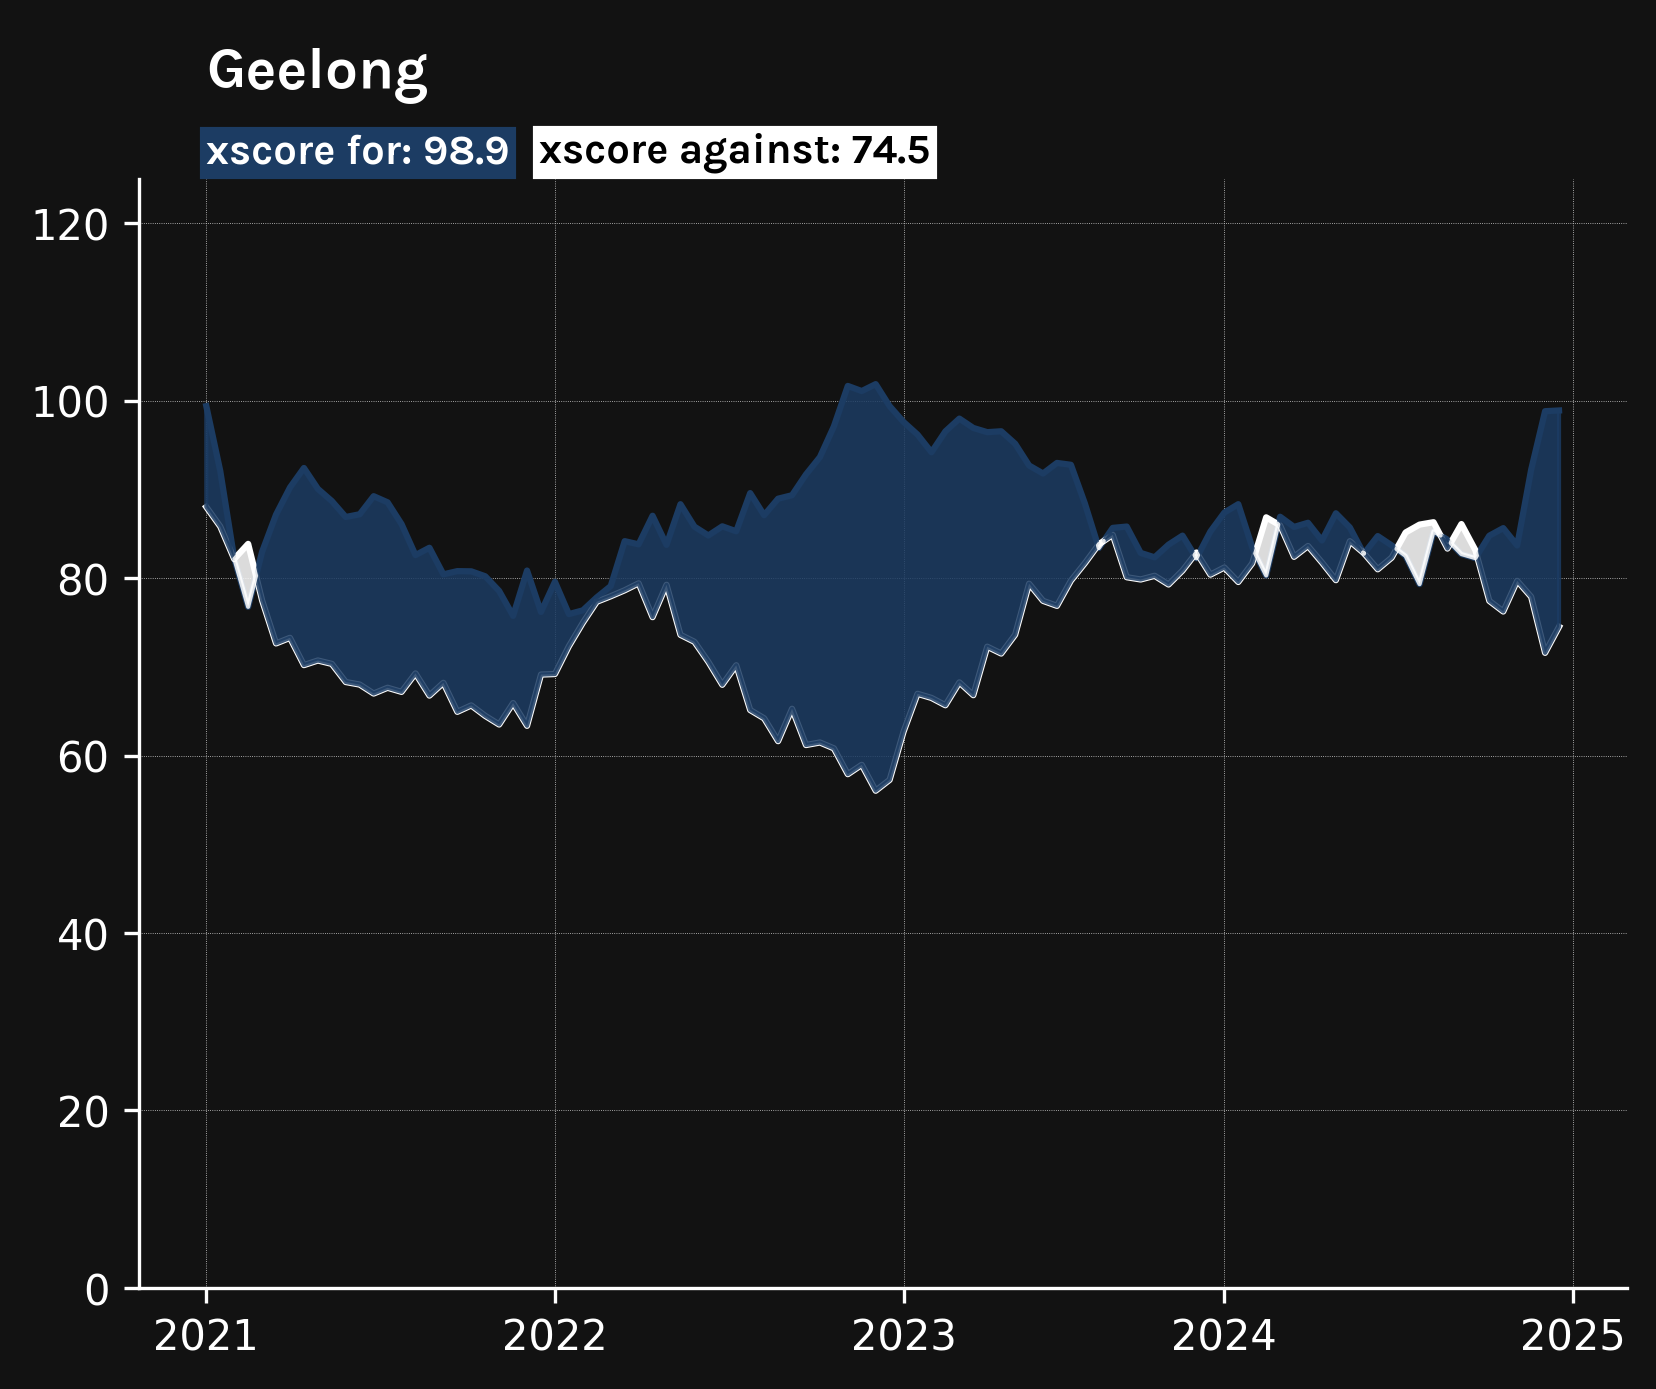

In [26]:
team = 'Geelong'
window = 10
metric = 'xscore'
# years = [2023, 2024]
# year_shots = shots[shots['Year'].isin([2023, 2024])]
team_rolling = create_team_rolling(shots, team, window, metric='xscore')
fig, ax = plt.subplots()
ax = plot_team_rolling_ax(ax, team, team_rolling, annotate=True)

In [27]:
fig.savefig('../_figures/geelong_rolling_averages_dark.png', format='png', bbox_inches='tight')

Plot All Teams

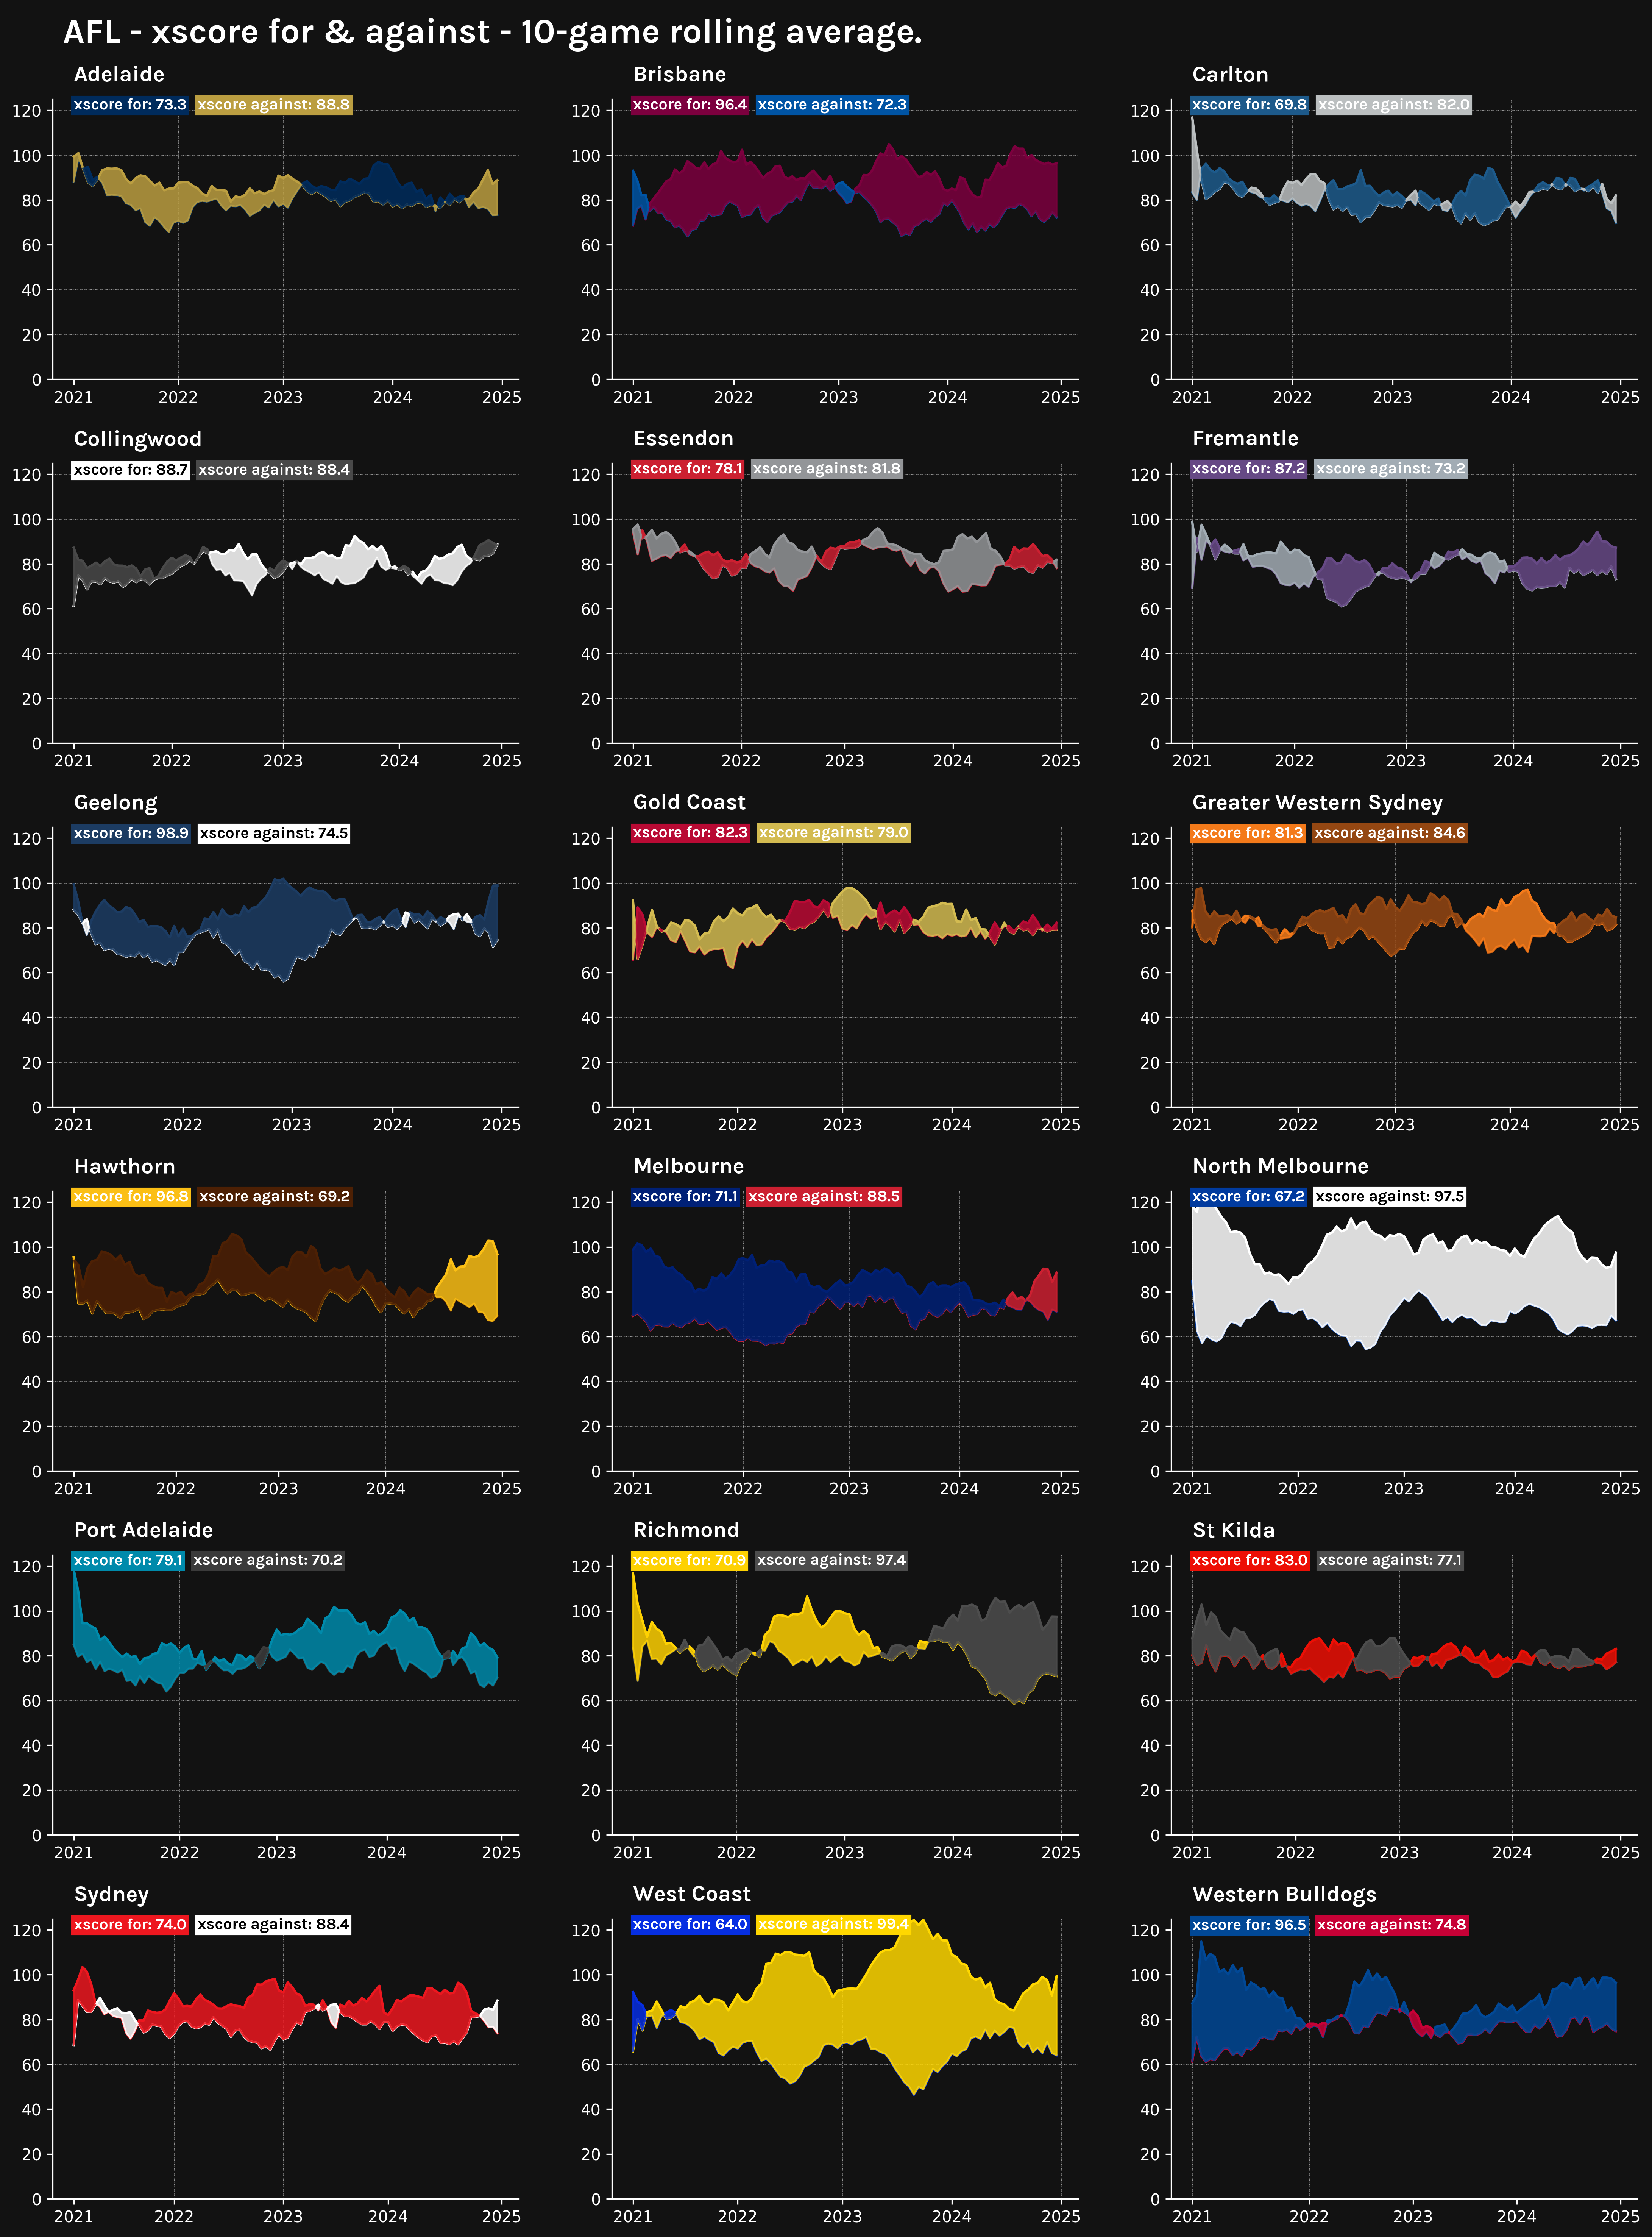

In [28]:
fig, ax = plot_all_team_rolling_figure(shots, window, metric = 'xscore')

In [29]:
fig.savefig('../_figures/team_rolling_averages_dark.png', format='png', bbox_inches='tight')